<a href="https://colab.research.google.com/github/tejalvs/RobotOdometryMining/blob/main/Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import plotly.express as px
from sklearn.model_selection import train_test_split 

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
roomba_data=pd.read_csv('/content/drive/MyDrive/RoombaData_XY_cleaned.csv')
mobile_robot_data=pd.read_csv('/content/drive/MyDrive/MobileRobot_XY_cleaned.csv')
roomba_data=roomba_data.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)
mobile_robot_data=mobile_robot_data.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)


In [6]:
mobile_robot_data.columns

Index(['X_ODOM', 'Y_ODOM', 'Theta', 'Velocity', 'Odometry_Distance', 'X_GR',
       'Y_GR', 'Ground_Truth_Distance', 'Surface_Type', 'Time_To_Travel',
       'Cumulative_Time', 'Cumulative_Theta', 'Series_ID',
       'Distance_travelled_error', 'X_error', 'Y_error', 'timestamp'],
      dtype='object')

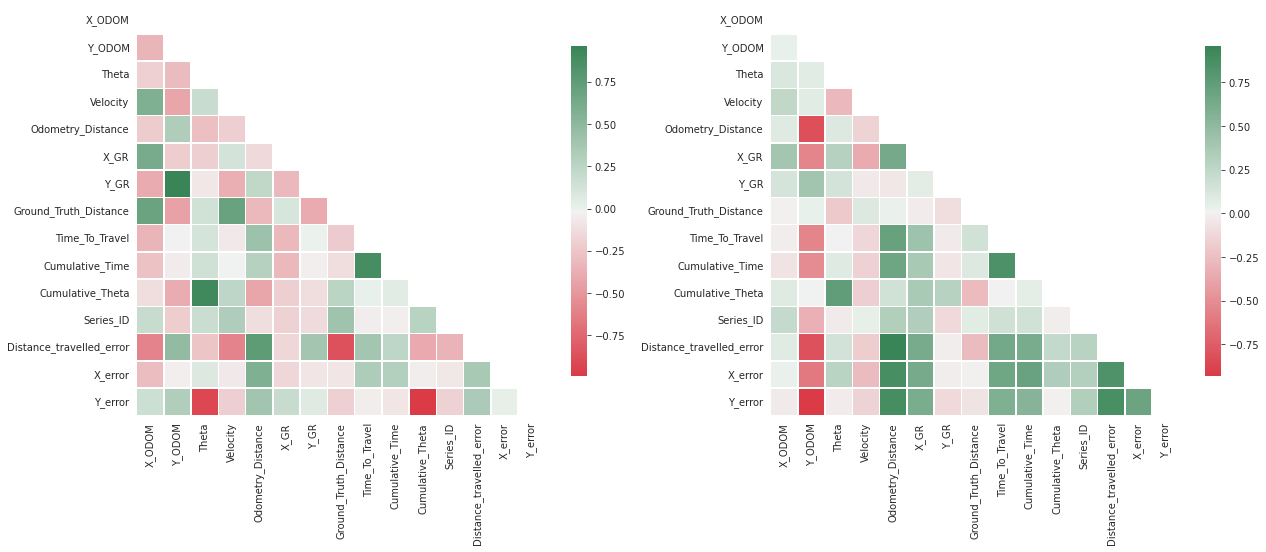

In [7]:
corr1 = roomba_data.corr()
corr2 = mobile_robot_data.corr()
# visualise the data with seaborn
mask = np.triu(np.ones_like(corr1, dtype=np.bool))
sns.set_style(style = 'white')
f, ax = plt.subplots(1,2,figsize=(18, 10))
cmap = sns.diverging_palette(10, 500, as_cmap=True)
sns.heatmap(corr1, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax[0])
mask = np.triu(np.ones_like(corr2, dtype=np.bool))
sns.heatmap(corr2, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax[1])
f.tight_layout()

In [8]:
data=mobile_robot_data[['Series_ID','Theta','Velocity','Cumulative_Time','Cumulative_Theta','Distance_travelled_error','Surface_Type','X_error', 'Y_error']]
label=[]
for i in data['Distance_travelled_error']:
  if i>0.01:
    label.append(1)
  else:
    label.append(0)
data['Label']=label
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Series_ID,Theta,Velocity,Cumulative_Time,Cumulative_Theta,Distance_travelled_error,Surface_Type,X_error,Y_error,Label
0,0.0,0.000000e+00,0.25,0.545720,0.000000e+00,0.012151,TILE,0.012141,0.000021,1
1,0.0,0.000000e+00,0.25,1.141841,0.000000e+00,0.012384,TILE,0.012228,0.000021,1
2,0.0,0.000000e+00,0.25,1.787944,0.000000e+00,0.013017,TILE,0.012441,0.000022,1
3,0.0,0.000000e+00,0.25,2.484894,0.000000e+00,0.018518,TILE,0.012168,0.000025,1
4,0.0,0.000000e+00,0.25,3.218403,0.000000e+00,0.021477,TILE,0.008079,0.000028,1
...,...,...,...,...,...,...,...,...,...,...
13313,61.0,-2.449294e-16,0.30,746.610621,-3.477997e-14,0.035410,CARPET,0.666759,0.003800,1
13314,61.0,-2.449294e-16,0.30,756.146195,-3.502490e-14,0.035323,CARPET,0.662488,0.003793,1
13315,61.0,-2.449294e-16,0.30,765.731923,-3.526983e-14,0.035381,CARPET,0.656178,0.003784,1
13316,61.0,-2.449294e-16,0.30,775.367627,-3.551476e-14,0.035381,CARPET,0.649981,0.003774,1


In [9]:
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import pyplot

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [10]:

# define dataset
X=data[['Theta'	,'Velocity',	'Cumulative_Time',	'Cumulative_Theta','Surface_Type'	,'X_error','Y_error']]
model=LogisticRegression(random_state=1)
# define the model
features=pd.get_dummies(data[['Theta'	,'Velocity',	'Cumulative_Time',	'Cumulative_Theta','X_error','Y_error','Surface_Type']])
model = LogisticRegression(random_state=1)
model.fit(features,data['Label'])
feature_importance=pd.DataFrame({'feature':list(features.columns),'feature_importance':[abs(i) for i in model.coef_[0]]})
feature_importance.sort_values('feature_importance')
feature_importance


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



,feature,feature_importance
0,Theta,0.505914
1,Velocity,0.339463
2,Cumulative_Time,0.000096
3,Cumulative_Theta,0.000783
4,X_error,0.529886
5,Y_error,0.612471
6,Surface_Type_CARPET,0.432788
7,Surface_Type_TILE,0.073481


In [11]:
model=RandomForestClassifier()
 
model.fit(features,data['Label'])
 
feature_importances=pd.DataFrame({'features':features.columns,'feature_importance':model.feature_importances_})
feature_importances.sort_values('feature_importance')

,features,feature_importance
7,Surface_Type_TILE,0.011653
6,Surface_Type_CARPET,0.012680
0,Theta,0.027690
3,Cumulative_Theta,0.056462
1,Velocity,0.190932
4,X_error,0.219117
2,Cumulative_Time,0.232190
5,Y_error,0.249277


In [12]:
model=smf.logit('Label~Theta+Velocity+Cumulative_Time+Cumulative_Theta+Surface_Type',data=data)
result = model.fit()
 
feature_importances=pd.DataFrame(result.conf_int()[1]).rename(columns={1:'Coefficients'}).eval("absolute_coefficients=abs(Coefficients)")
feature_importances.sort_values('absolute_coefficients',ascending=False).drop('Intercept')[['absolute_coefficients']]


Optimization terminated successfully.
         Current function value: 0.531569
         Iterations 6


,absolute_coefficients
Surface_Type[T.TILE],0.351040
Velocity,0.231863
Theta,0.183890
Cumulative_Time,0.000417
Cumulative_Theta,0.000186


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
data

,Series_ID,Theta,Velocity,Cumulative_Time,Cumulative_Theta,Distance_travelled_error,Surface_Type,X_error,Y_error,Label
0,0.0,0.000000e+00,0.25,0.545720,0.000000e+00,0.012151,TILE,0.012141,0.000021,1
1,0.0,0.000000e+00,0.25,1.141841,0.000000e+00,0.012384,TILE,0.012228,0.000021,1
2,0.0,0.000000e+00,0.25,1.787944,0.000000e+00,0.013017,TILE,0.012441,0.000022,1
3,0.0,0.000000e+00,0.25,2.484894,0.000000e+00,0.018518,TILE,0.012168,0.000025,1
4,0.0,0.000000e+00,0.25,3.218403,0.000000e+00,0.021477,TILE,0.008079,0.000028,1
...,...,...,...,...,...,...,...,...,...,...
13313,61.0,-2.449294e-16,0.30,746.610621,-3.477997e-14,0.035410,CARPET,0.666759,0.003800,1
13314,61.0,-2.449294e-16,0.30,756.146195,-3.502490e-14,0.035323,CARPET,0.662488,0.003793,1
13315,61.0,-2.449294e-16,0.30,765.731923,-3.526983e-14,0.035381,CARPET,0.656178,0.003784,1
13316,61.0,-2.449294e-16,0.30,775.367627,-3.551476e-14,0.035381,CARPET,0.649981,0.003774,1


In [14]:
X=data[['Theta','Velocity','Cumulative_Time','Cumulative_Theta','X_error','Y_error']]
Y=data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)


In [15]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

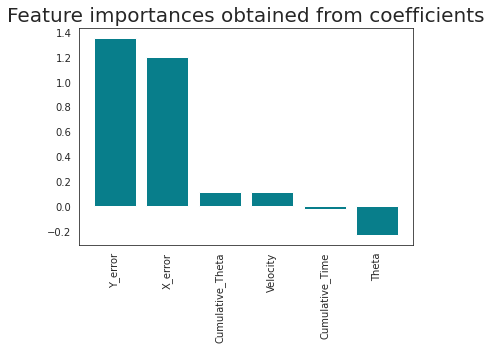

In [16]:

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [17]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

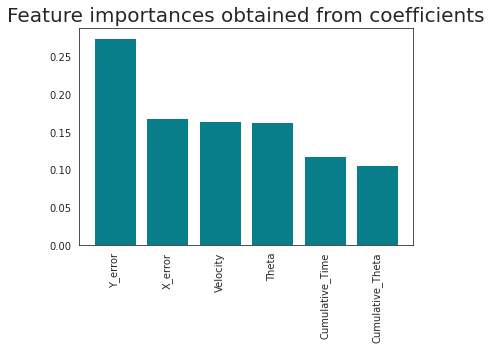

In [18]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [19]:
from sklearn.decomposition import PCA

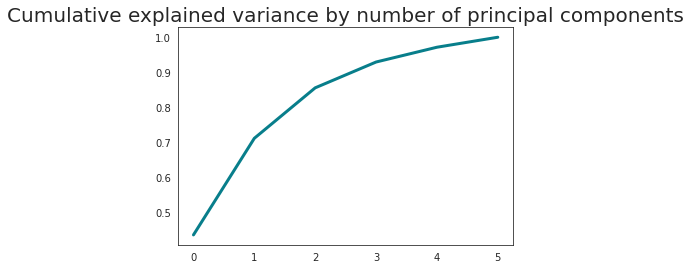

In [20]:
pca = PCA().fit(X_train_scaled)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()


In [21]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(X_train.columns) + 1)],
    index=X_train.columns
)

In [22]:
loadings.head()


,PC1,PC2,PC3,PC4,PC5,PC6
Theta,0.522311,-0.765349,-0.088462,0.061441,0.350458,0.084327
Velocity,-0.435974,0.188910,-0.877834,-0.008752,0.050595,0.033334
Cumulative_Time,0.736163,0.431892,-0.104403,0.487887,0.033003,-0.147005
Cumulative_Theta,0.526954,-0.737558,-0.255240,-0.096044,-0.268843,-0.178267
X_error,0.908002,0.209632,-0.102114,-0.040054,-0.172373,0.299905


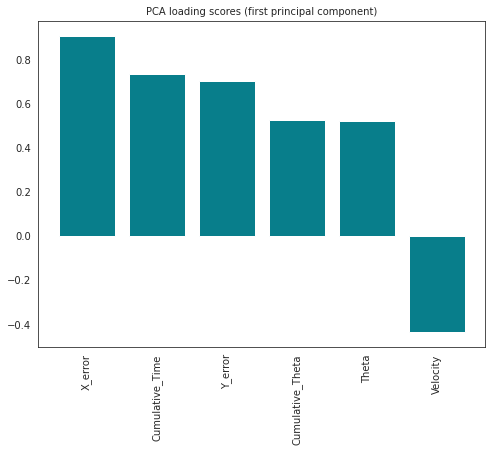

In [23]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']
plt.figure(figsize=(8,6))
plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=10)
plt.xticks(rotation='vertical')
plt.show()


In [24]:
data1=data.copy(deep=True)
data1=data1.drop(['Distance_travelled_error','X_error','Y_error'],axis=1)
data1

,Series_ID,Theta,Velocity,Cumulative_Time,Cumulative_Theta,Surface_Type,Label
0,0.0,0.000000e+00,0.25,0.545720,0.000000e+00,TILE,1
1,0.0,0.000000e+00,0.25,1.141841,0.000000e+00,TILE,1
2,0.0,0.000000e+00,0.25,1.787944,0.000000e+00,TILE,1
3,0.0,0.000000e+00,0.25,2.484894,0.000000e+00,TILE,1
4,0.0,0.000000e+00,0.25,3.218403,0.000000e+00,TILE,1
...,...,...,...,...,...,...,...
13313,61.0,-2.449294e-16,0.30,746.610621,-3.477997e-14,CARPET,1
13314,61.0,-2.449294e-16,0.30,756.146195,-3.502490e-14,CARPET,1
13315,61.0,-2.449294e-16,0.30,765.731923,-3.526983e-14,CARPET,1
13316,61.0,-2.449294e-16,0.30,775.367627,-3.551476e-14,CARPET,1


In [25]:
array=data1.values
x=array[:,0:5]
y=array[:,5]
y

array(['TILE', 'TILE', 'TILE', ..., 'CARPET', 'CARPET', 'CARPET'],
      dtype=object)

In [26]:
from sklearn.feature_selection import RFE

model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(x, y)
print("Num Features: %d"% fit.n_features_)
print("Selected Features: %s"% fit.support_) 
print("Feature Ranking: %s"% fit.ranking_)


Num Features: 3
Selected Features: [ True  True  True False False]
Feature Ranking: [1 1 1 3 2]


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance

# Train a basic logit model on this simple data,
# replace this with your model
clf = LogisticRegression().fit(x, y)
# Here's how you use permutation importance
result = permutation_importance(clf, x, y, n_repeats=10,
                                random_state=0)
print('Permutation importance scores', result.importances)

Permutation importance scores [[ 0.20198228  0.19830305  0.20010512  0.20588677  0.19830305  0.20175702
   0.20213245  0.20581168  0.19852831  0.20310857]
 [-0.01531762 -0.01531762 -0.01516744 -0.01464184 -0.01599339 -0.01118787
  -0.01441658 -0.01614357 -0.0148671  -0.01314011]
 [ 0.00232768  0.00225259  0.00210242  0.00045052  0.00337889  0.00150173
   0.00397958  0.00600691  0.00420484  0.00247785]
 [ 0.04077189  0.0385193   0.03761826  0.03589127  0.03671722  0.037393
   0.03559093  0.03814387  0.03972068  0.03829404]
 [ 0.00292837  0.00037543  0.00255294  0.00322871  0.00225259  0.00465535
   0.00180207 -0.00172699  0.00150173  0.00285328]]


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [29]:

df = mobile_robot_data[['X_ODOM','Y_ODOM','X_GR','Y_GR','Theta','Velocity','Cumulative_Time','Cumulative_Theta','Distance_travelled_error']]
nbrs = NearestNeighbors(n_neighbors = 10)
# fit model
nbrs.fit(df)


NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

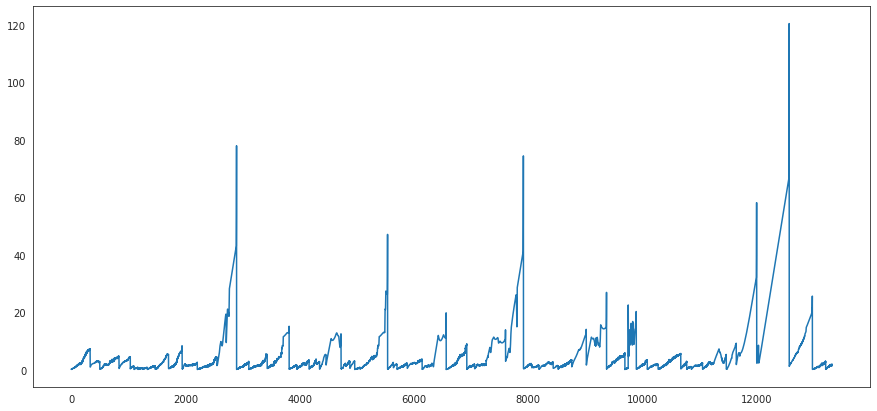

In [30]:
# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(df)
# plot
plt.figure(figsize=(15, 7))
plt.plot(distances.mean(axis =1))

In [31]:
distances = pd.DataFrame(distances)
distances_mean = distances.mean(axis =1)
distances_mean

0        0.144300
1        0.116498
2        0.148449
3        0.205615
4        0.135955
           ...   
13313    1.643437
13314    1.497890
13315    1.914529
13316    1.441655
13317    1.423706
Length: 13318, dtype: float64

In [32]:
distances_mean.describe()

count    13318.000000
mean         5.972423
std          9.568980
min          0.080383
25%          1.202961
50%          2.274183
75%          6.307542
max        120.418914
dtype: float64

In [33]:
th = 9.0
outlier_index = np.where(distances_mean > th)
outlier_index


(array([ 2611,  2612,  2613, ..., 12968, 12969, 12970]),)

In [34]:
outlier_values = df.iloc[outlier_index]
outlier_values

,X_ODOM,Y_ODOM,X_GR,Y_GR,Theta,Velocity,Cumulative_Time,Cumulative_Theta,Distance_travelled_error
2611,0.643,-0.499,0.640848,-0.236214,-1.221730,0.1,119.103522,-75.625116,0.029881
2612,0.646,-0.508,0.643223,-0.239374,-1.221730,0.1,122.574084,-76.846847,0.033199
2613,0.650,-0.517,0.647912,-0.245611,-1.221730,0.1,126.111342,-78.068577,0.029372
2614,0.653,-0.527,0.651358,-0.250195,-1.221730,0.1,129.698658,-79.290308,0.024151
2615,0.657,-0.536,0.654755,-0.254714,-1.221730,0.1,133.336097,-80.512038,0.019657
...,...,...,...,...,...,...,...,...,...
12966,13.081,-0.387,0.617533,-0.022429,-0.017453,0.5,3651.453336,-15.236724,12.164841
12967,13.131,-0.389,0.618052,-0.022448,-0.017453,0.5,3663.966327,-15.254178,11.921902
12968,13.178,-0.390,0.619589,-0.022503,-0.034907,0.5,3676.525408,-15.289084,12.117725
12969,13.227,-0.392,0.620056,-0.022520,-0.034907,0.5,3689.107577,-15.323991,12.333996


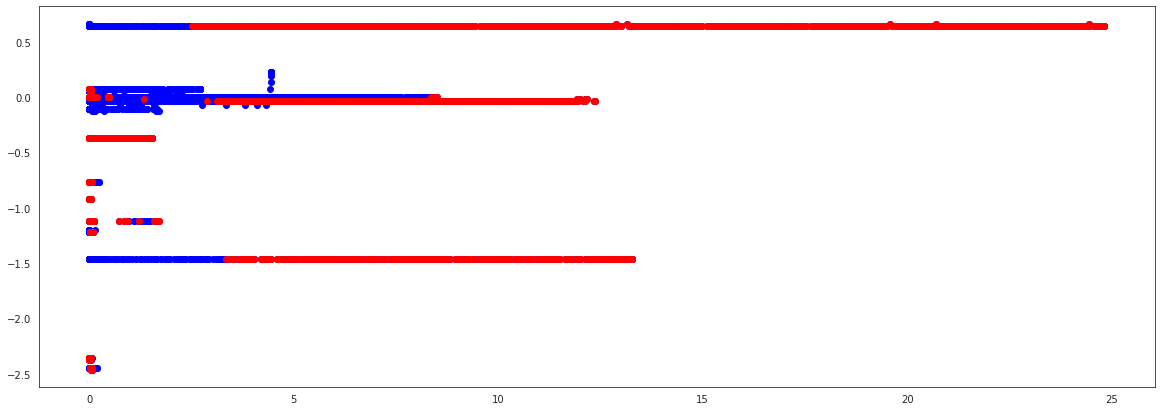

In [35]:
plt.figure(figsize=(20, 7))
plt.scatter(df["Distance_travelled_error"], df["Theta"], color = "b")
# plot outlier values
plt.scatter(outlier_values["Distance_travelled_error"], outlier_values["Theta"], color = "r")

Text(0, 0.5, 'Distance_travelled_error')

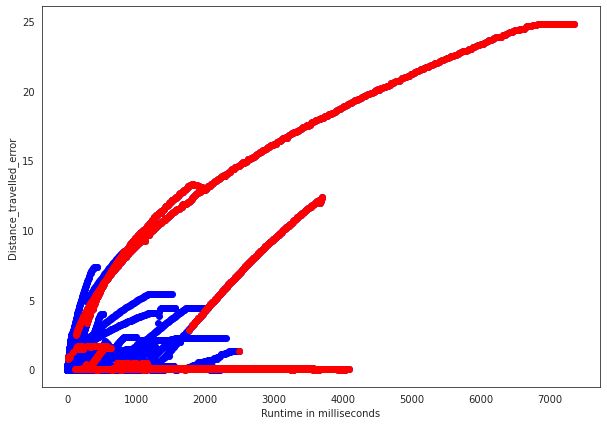

In [36]:
plt.figure(figsize=(10, 7))
plt.scatter(df["Cumulative_Time"], df["Distance_travelled_error"], color = "b")
# plot outlier values
plt.scatter(outlier_values["Cumulative_Time"], outlier_values["Distance_travelled_error"], color = "r")
plt.xlabel("Runtime in milliseconds")
plt.ylabel("Distance_travelled_error")

In [39]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

X=mobile_robot_data[['Theta']]
Y=mobile_robot_data[['Distance_travelled_error']]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

In [40]:
slr= LinearRegression()  
slr.fit(x_train, y_train)

NameError: ignored

In [ ]:

#Printing the model coefficients
print('Intercept: ', slr.intercept_)
print('Coefficient:', slr.coef_)

In [ ]:
slr.intercept_[0]
slr.coef_[0][0]
print('Regression Equation: Sales = '+str(slr.intercept_[0])+'+'+  str(slr.coef_[0][0]) +'* Theta')

In [ ]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 1.3739008824165366 + 0.86386133*x_train, 'r')
plt.show()

In [ ]:
#Prediction of Test and Training set result  
y_pred_slr= slr.predict(x_test)  
x_pred_slr= slr.predict(x_train)

In [ ]:
print("Prediction for test set: {}".format(y_pred_slr))


In [ ]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()  
mlr.fit(x_train, y_train)

In [ ]:
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

In [ ]:
y_pred_mlr= mlr.predict(x_test)
print("Prediction for test set: {}".format(y_pred_mlr))
 